In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
npz_path= '/content/drive/MyDrive/Colab Notebooks/dcp.npz'
model_path = '/content/buah.h5'
csv_path = 'training_history.csv'
json_path = 'training_history.json'

In [ ]:
def load_and_prepare_data(npz_path= npz_path, batch_size=128):

    data = np.load(npz_path)

    train_images = data['train_images']
    train_labels = data['train_labels']
    val_images = data['val_images']
    val_labels = data['val_labels']


    train_images = train_images.astype(np.float32) / 255.0
    val_images = val_images.astype(np.float32) / 255.0


    train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
    validation_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))


    train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    validation_dataset = validation_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

    return train_dataset, validation_dataset

In [4]:
train_dataset, validation_dataset=load_and_prepare_data()

Image batch shape: (128, 200, 200, 3)
Label batch shape: (128, 5)


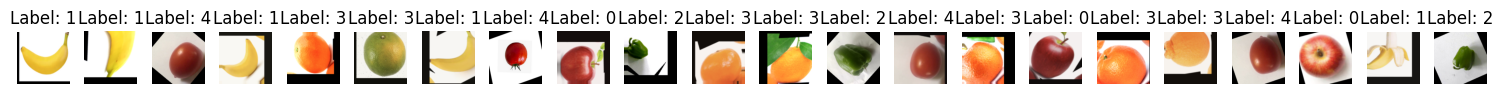

In [ ]:


def display_samples(dataset, num_samples=5):
    dataset_iterator = dataset.as_numpy_iterator()

    images, labels = next(dataset_iterator)

    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)

    images = images[:num_samples]
    labels = labels[:num_samples]

    plt.figure(figsize=(15, 5))

    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i])
        plt.title(f'Label: {np.argmax(labels[i])}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_samples(train_dataset, num_samples=22)



In [6]:
SHUFFLE_BUFFER_SIZE = 128
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                       )

validation_dataset_final = (validation_dataset
                            .cache()
                            .prefetch(PREFETCH_BUFFER_SIZE)
                            )


In [ ]:
def create_model(num_classes=5):
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(200, 200, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(213, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(510, activation='relu'),
        tf.keras.layers.Dense(125, activation='relu'),

        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
        metrics=['accuracy']
    )

    return model




In [8]:
model = create_model()

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 213)         │         245,589 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 213)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 512)           │         982,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 510)                 │       4,178,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 125)                 │          63,875 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 125)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             630 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,563,788 (21.22 MB)

 Trainable params: 5,563,788 (21.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy', 0) >= 0.95 and logs.get('val_accuracy', 0) >= 0.80:
          self.model.stop_training = True
          print("\nReached 95% train accuracy and 80% validation accuracy, so cancelling training!")

In [ ]:
def load_image_from_npz(npz_path, index):
    data = np.load(npz_path)
    images = data['train_images']
    return images[index]

In [ ]:

def visualize_intermediate_layers(model, img_array, rescale_layer=None):
    successive_outputs = [layer.output for layer in model.layers[1:]]
    visualization_model = tf.keras.models.Model(inputs=model.inputs, outputs=successive_outputs)

    x = img_array.reshape((1,) + img_array.shape)

    if rescale_layer is not None:
        x = rescale_layer(x)

    successive_feature_maps = visualization_model.predict(x, verbose=False)

    layer_names = [layer.name for layer in model.layers[1:]]

    for layer_name, feature_map in zip(layer_names, successive_feature_maps):
        if len(feature_map.shape) == 4:
            n_features = feature_map.shape[-1]
            size = feature_map.shape[1]

            display_grid = np.zeros((size, size * n_features))
            for i in range(n_features):
                x = feature_map[0, :, :, i]
                x -= x.mean()
                x /= x.std() if x.std() > 0 else 1
                x *= 64
                x += 128
                x = np.clip(x, 0, 255).astype('uint8')

                # Tile each filter into the grid
                display_grid[:, i * size:(i + 1) * size] = x

            scale = 40. / n_features
            plt.figure(figsize=(scale * n_features, scale * 1.5))
            plt.title(layer_name)
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap='viridis')
            plt.axis('off')  # Hide axis
            plt.show()




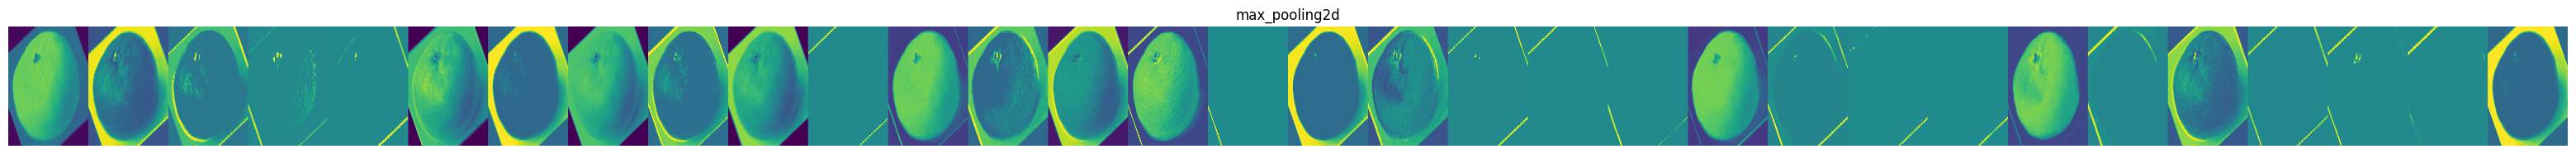

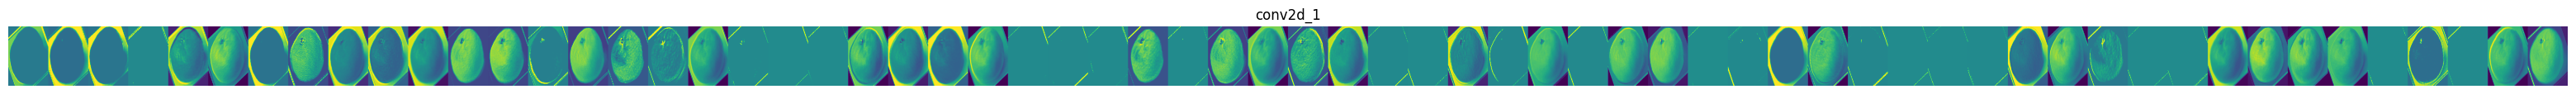

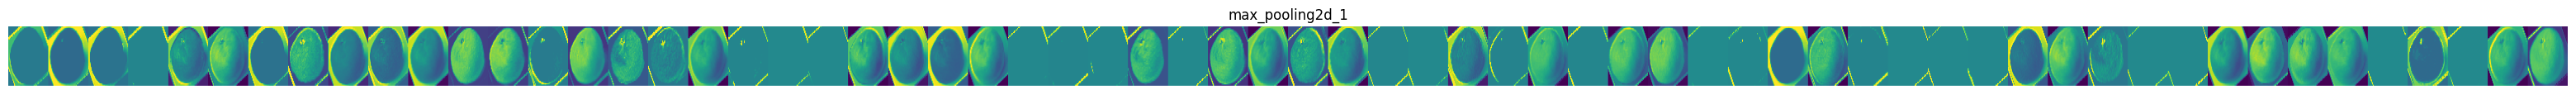

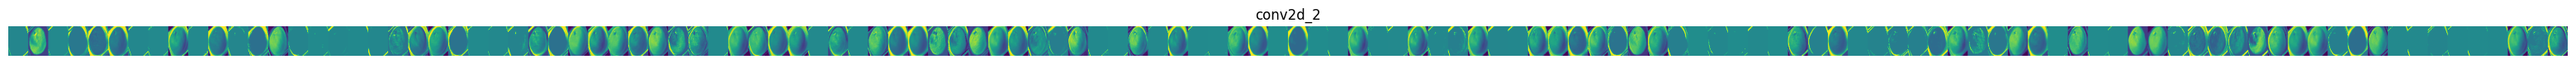

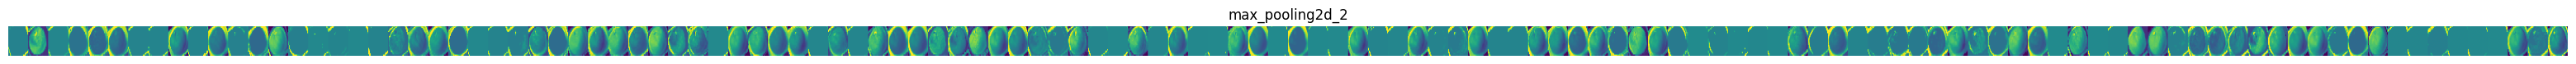

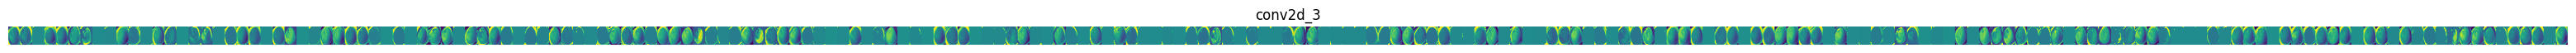

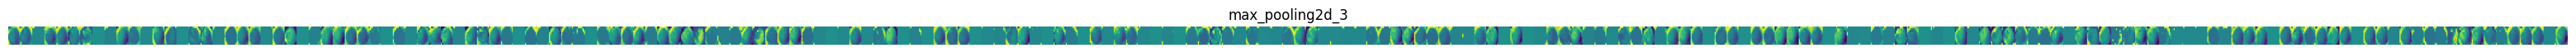

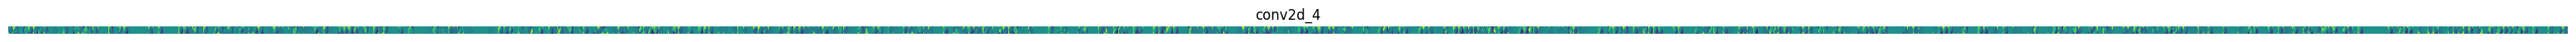

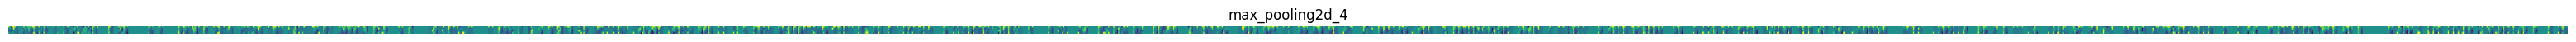

In [ ]:
npz_path = npz_path
image_index = 10  

img = load_image_from_npz(npz_path, image_index)

if img.ndim == 3:
    rescale_layer = tf.keras.layers.Rescaling(1./255)
    visualize_intermediate_layers(model, img, rescale_layer=rescale_layer)
else:
    print("Error: Loaded image does not have the correct shape.")


In [ ]:
import json

history = model.fit(
    train_dataset_final,
    epochs=60,
    validation_data=validation_dataset_final,
    callbacks=[EarlyStoppingCallback()]
)

model.save(model_path)

with open(json_path, 'w') as f:
    json.dump(history.history, f)

history_data = np.array([history.history['loss'], history.history['val_loss'],
                          history.history['accuracy'], history.history['val_accuracy']]).T

np.savetxt(csv_path, history_data, delimiter=',',
           header='loss,val_loss,accuracy,val_accuracy', comments='')


Epoch 1/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 55s 834ms/step - accuracy: 0.4003 - loss: 1.3524 - val_accuracy: 0.6736 - val_loss: 0.8067
Epoch 2/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 38s 182ms/step - accuracy: 0.7333 - loss: 0.7116 - val_accuracy: 0.8388 - val_loss: 0.4707
Epoch 3/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 195ms/step - accuracy: 0.8127 - loss: 0.5169 - val_accuracy: 0.8971 - val_loss: 0.3137
Epoch 4/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - accuracy: 0.8542 - loss: 0.3838 - val_accuracy: 0.9267 - val_loss: 0.2280
Epoch 5/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - accuracy: 0.8986 - loss: 0.2782 - val_accuracy: 0.9408 - val_loss: 0.1759
Epoch 6/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 190ms/step - accuracy: 0.9190 - loss: 0.2273 - val_accuracy: 0.9505 - val_loss: 0.1426
Epoch 7/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - accuracy: 0.9159 - loss: 0.2144 - val_accuracy: 0.9488 - val_loss: 0.1393
Epoch 8/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 184ms/step - accuracy: 0.9525 - loss: 0.1404 - val_accuracy

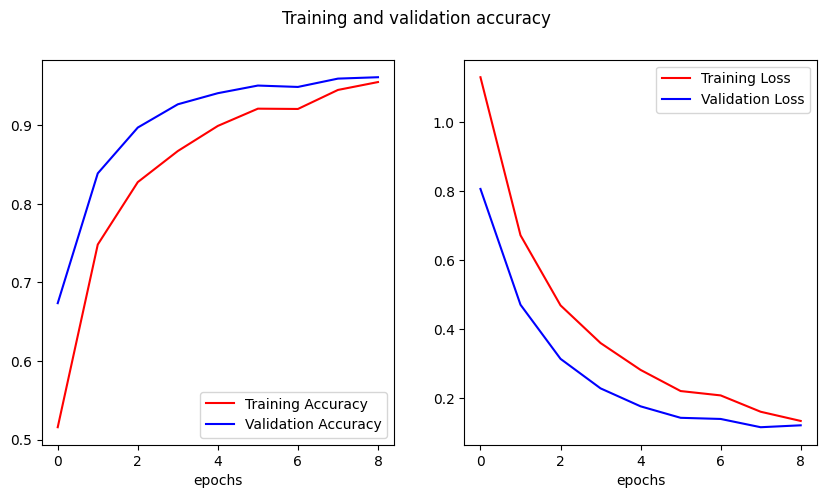

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model(model_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
Predictions: [[8.8870752e-01 3.5915160e-04 2.3769708e-04 1.0027891e-01 1.0416701e-02]]
Predicted Class: 0


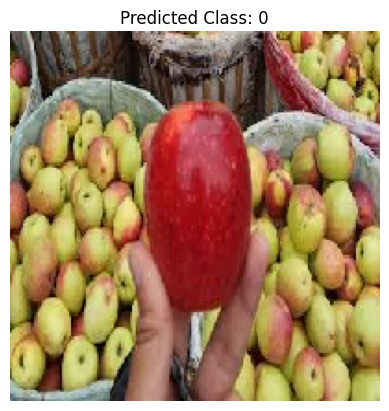

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predictions: [[1.6728556e-04 9.9610341e-01 2.0034563e-06 3.3040470e-03 4.2319275e-04]]
Predicted Class: 1


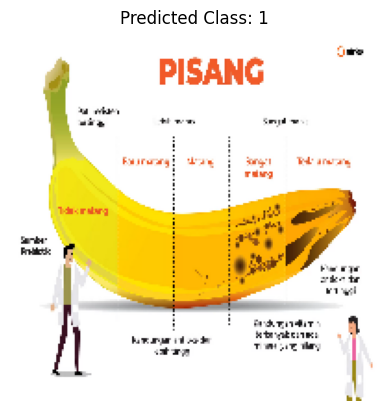

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predictions: [[4.5948989e-05 1.9286281e-06 9.9990487e-01 1.0075971e-06 4.6269510e-05]]
Predicted Class: 2


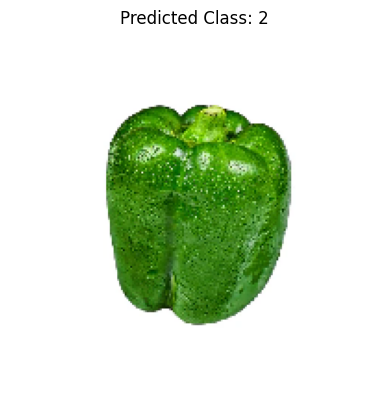

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predictions: [[5.3443667e-04 3.8297486e-04 7.9142728e-06 9.9888641e-01 1.8829697e-04]]
Predicted Class: 3


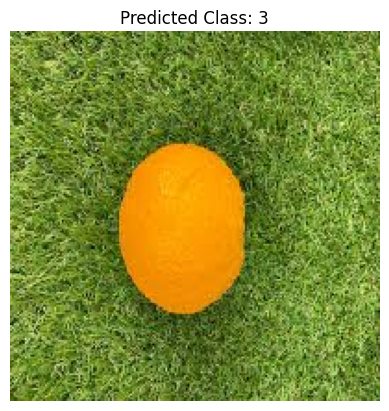

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predictions: [[4.5151152e-02 8.0471049e-04 2.9421025e-03 1.0628887e-02 9.4047320e-01]]
Predicted Class: 4


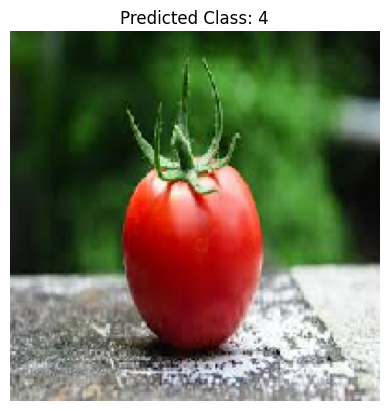

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

def load_and_predict(model, image_path):
    img = load_img(image_path, target_size=(200, 200))
    img_array = img_to_array(img)
    img_array = img_array.reshape((1,) + img_array.shape)
    img_array = img_array / 255.0

    predictions = model.predict(img_array)

    print("Predictions:", predictions)
    predicted_class = np.argmax(predictions[0])
    print("Predicted Class:", predicted_class)

    plt.imshow(img)
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis('off')
    plt.show()

load_and_predict(model, '/content/apple.jpg')
load_and_predict(model, '/content/Screenshot 2024-11-21 190943.png')
load_and_predict(model, '/content/paprika.png')
load_and_predict(model, '/content/jeruk.jpg')
load_and_predict(model, '/content/tomat.jpg')
